In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

from matplotlib import font_manager as fm 
from matplotlib import cm 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from scipy.sparse import hstack

In [2]:
# get data, prepare to train ann validation split
reviews=pd.read_csv("review_train.csv")

In [3]:
# features in dataset
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i..."
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t..."


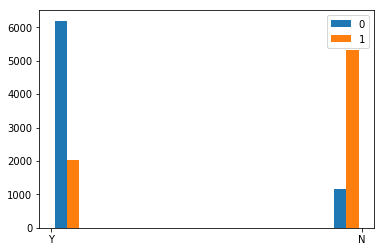

In [4]:
# verified purchase relation ship with 0,1 , fill N instead of NA
plt.hist([reviews[reviews['LABEL']==0]['VERIFIED_PURCHASE'].fillna("N"),reviews[reviews['LABEL']==1]['VERIFIED_PURCHASE'].fillna("N")],label=[0,1])
plt.legend()
plt.show()

In [5]:
reviews.isnull().sum()
# why is null should be considered when writing report

REVIEW_ID              0
LABEL                  0
RATING                94
VERIFIED_PURCHASE    119
PRODUCT_CATEGORY     113
PRODUCT_ID           129
PRODUCT_TITLE         99
REVIEW_TITLE          96
REVIEW_TEXT           93
dtype: int64

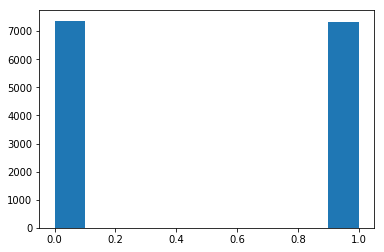

In [6]:
# histogram of the dataset, 0=fake revriews, 1=true reviews
plt.hist(reviews['LABEL'])
plt.show()
# half fake half normal

In [7]:
# no. of categories
reviews['PRODUCT_CATEGORY'].nunique()

30

In [8]:
# list category
reviews['PRODUCT_CATEGORY'].unique()

array(['Baby', 'Home Entertainment', 'Musical Instruments', 'Watches',
       'Health & Personal Care', 'Sports', 'Home Improvement',
       'Automotive', 'Shoes', 'Grocery', 'Kitchen', 'Office Products',
       'Home', 'PC', 'Toys', 'Video DVD', 'Apparel', 'Electronics',
       'Tools', 'Video Games', 'Camera', 'Jewelry', 'Beauty', 'Luggage',
       'Pet Products', 'Wireless', 'Books', 'Furniture', 'Outdoors',
       'Lawn and Garden', nan], dtype=object)

In [9]:
# data into groups by category 
reviews_grp=reviews.groupby('PRODUCT_CATEGORY')

In [10]:
# how many reviews on each category
reviews_grp.count()['REVIEW_ID']

PRODUCT_CATEGORY
Apparel                   495
Automotive                493
Baby                      480
Beauty                    471
Books                     518
Camera                    474
Electronics               482
Furniture                 500
Grocery                   503
Health & Personal Care    484
Home                      476
Home Entertainment        478
Home Improvement          503
Jewelry                   477
Kitchen                   504
Lawn and Garden           493
Luggage                   504
Musical Instruments       449
Office Products           510
Outdoors                  481
PC                        509
Pet Products              484
Shoes                     468
Sports                    459
Tools                     486
Toys                      488
Video DVD                 481
Video Games               483
Watches                   488
Wireless                  466
Name: REVIEW_ID, dtype: int64

In [11]:
# No. of 0(fake reviews) in each category
reviews_grp.sum()['LABEL']

PRODUCT_CATEGORY
Apparel                   241
Automotive                251
Baby                      234
Beauty                    232
Books                     262
Camera                    228
Electronics               249
Furniture                 241
Grocery                   243
Health & Personal Care    244
Home                      232
Home Entertainment        236
Home Improvement          251
Jewelry                   240
Kitchen                   253
Lawn and Garden           252
Luggage                   260
Musical Instruments       232
Office Products           244
Outdoors                  236
PC                        251
Pet Products              245
Shoes                     227
Sports                    234
Tools                     250
Toys                      243
Video DVD                 240
Video Games               241
Watches                   233
Wireless                  225
Name: LABEL, dtype: int64

In [12]:
# persentage on label=1 
reviews_grp.mean()['LABEL']
# around 50%

PRODUCT_CATEGORY
Apparel                   0.486869
Automotive                0.509128
Baby                      0.487500
Beauty                    0.492569
Books                     0.505792
Camera                    0.481013
Electronics               0.516598
Furniture                 0.482000
Grocery                   0.483101
Health & Personal Care    0.504132
Home                      0.487395
Home Entertainment        0.493724
Home Improvement          0.499006
Jewelry                   0.503145
Kitchen                   0.501984
Lawn and Garden           0.511156
Luggage                   0.515873
Musical Instruments       0.516704
Office Products           0.478431
Outdoors                  0.490644
PC                        0.493124
Pet Products              0.506198
Shoes                     0.485043
Sports                    0.509804
Tools                     0.514403
Toys                      0.497951
Video DVD                 0.498960
Video Games               0.498965
Wat

In [13]:
no_label1 = reviews[reviews['LABEL']==1]['PRODUCT_CATEGORY'].value_counts() 
no_label0 = reviews[reviews['LABEL']==0]['PRODUCT_CATEGORY'].value_counts()
no_label1

Books                     262
Luggage                   260
Kitchen                   253
Lawn and Garden           252
Automotive                251
Home Improvement          251
PC                        251
Tools                     250
Electronics               249
Pet Products              245
Health & Personal Care    244
Office Products           244
Grocery                   243
Toys                      243
Video Games               241
Apparel                   241
Furniture                 241
Jewelry                   240
Video DVD                 240
Home Entertainment        236
Outdoors                  236
Sports                    234
Baby                      234
Watches                   233
Home                      232
Musical Instruments       232
Beauty                    232
Camera                    228
Shoes                     227
Wireless                  225
Name: PRODUCT_CATEGORY, dtype: int64

In [14]:
no_label0

Office Products           266
Grocery                   260
Furniture                 259
PC                        258
Books                     256
Watches                   255
Apparel                   254
Home Improvement          252
Kitchen                   251
Baby                      246
Camera                    246
Toys                      245
Outdoors                  245
Home                      244
Luggage                   244
Video Games               242
Automotive                242
Home Entertainment        242
Video DVD                 241
Wireless                  241
Lawn and Garden           241
Shoes                     241
Health & Personal Care    240
Pet Products              239
Beauty                    239
Jewelry                   237
Tools                     236
Electronics               233
Sports                    225
Musical Instruments       217
Name: PRODUCT_CATEGORY, dtype: int64

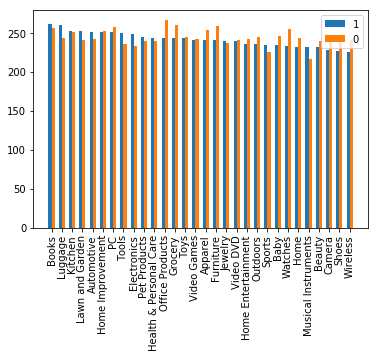

In [15]:
# plot 0,1 distribution under each category
plt.bar(no_label1.index,no_label1.values, width=-0.3, align='edge', label=1)
plt.bar(no_label0.index,no_label0.values, width=0.3,align='edge' ,label=0)

plt.legend()
plt.xticks(rotation=90)
plt.show()
# office products,grocery, furniture,apparel,watches, normal>fake
# luggage,tools,musical instruments, electronics fake>nolmal

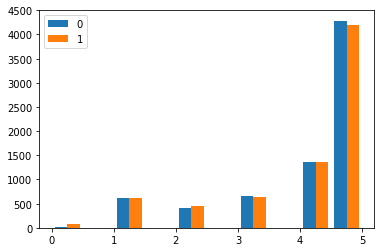

In [16]:
# we have 94 null in rating feature which need to be filled with 0
# relationship with rating and reviews
plt.hist([reviews[reviews['LABEL']==0]['RATING'].fillna(0),reviews[reviews['LABEL']==1]['RATING'].fillna(0)],label=[0,1],range = (0,5))
plt.legend()
plt.show()
# nearly same distribution of 0,1 in ratings

In [17]:
# length of text product features
reviews['array_title'] = reviews['PRODUCT_TITLE'].str.split(" ")
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec..."
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,..."
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon..."
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,..."
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra..."


In [18]:
reviews['length_title'] = reviews['array_title'].str.len()
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0


In [19]:
# fill na length in 0
length_titlef0=reviews[reviews['LABEL']==0]['length_title'].mean()
length_titlef0


10.635186699373126

In [20]:
# fill na length in 1
length_titlef1=reviews[reviews['LABEL']==1]['length_title'].mean()
length_titlef1

13.822249759052733

In [21]:
#get length under 0,1 fill na with mean of length title 
length_title=reviews['length_title'].mean()
length_title0 = reviews[reviews['LABEL']==0]['length_title'].fillna(length_titlef0)
length_title1 = reviews[reviews['LABEL']==1]['length_title'].fillna(length_titlef1)


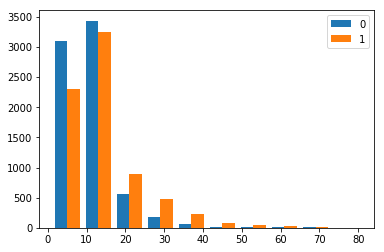

In [22]:
plt.hist([length_title0,length_title1],label=[0,1])
plt.legend()
plt.show()

In [23]:
# length of  review title features
reviews['array_reviewtitle'] = reviews['REVIEW_TITLE'].str.split(" ")
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title,array_reviewtitle
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0,"[Great, idea, for, Mom's, with, teething, babies]"
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0,"[Great, purchase, for, the, price]"
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0,"[the, best, trombone]"
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0,"[Works, well]"
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0,"[Excellent, article!]"


In [24]:
reviews['length_reviewtitle'] = reviews['array_reviewtitle'].str.len()
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title,array_reviewtitle,length_reviewtitle
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0,"[Great, idea, for, Mom's, with, teething, babies]",7.0
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0,"[Great, purchase, for, the, price]",5.0
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0,"[the, best, trombone]",3.0
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0,"[Works, well]",2.0
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0,"[Excellent, article!]",2.0


In [25]:
# fill na length in 0 review title
length_reviewtitlef0=reviews[reviews['LABEL']==0]['length_reviewtitle'].mean()
length_reviewtitlef0

5.1421174546941

In [26]:
# fill na length in 1 review title
length_reviewtitlef1=reviews[reviews['LABEL']==1]['length_reviewtitle'].mean()
length_reviewtitlef1

4.402752924982794

In [27]:
#get length under 0,1 fill na with mean of length title 
length_reviewtitle=reviews['length_reviewtitle'].mean()
length_reviewtitle0 = reviews[reviews['LABEL']==0]['length_reviewtitle'].fillna(length_reviewtitlef0)
length_reviewtitle1 = reviews[reviews['LABEL']==1]['length_reviewtitle'].fillna(length_reviewtitlef1)


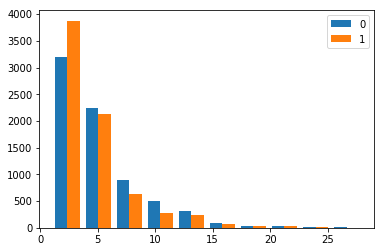

In [28]:
plt.hist([length_reviewtitle0,length_reviewtitle1],label=[0,1])
plt.legend()
plt.show()

In [29]:
# length of  review text features
reviews['array_text'] = reviews['REVIEW_TEXT'].str.split(" ")
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title,array_reviewtitle,length_reviewtitle,array_text
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0,"[Great, idea, for, Mom's, with, teething, babies]",7.0,"[Great, idea, for, Mom's, with, teething, babi..."
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0,"[Great, purchase, for, the, price]",5.0,"[We, needed, a, new, VCR, and, found, this, on..."
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0,"[the, best, trombone]",3.0,"[my, so, love, trombone, and, so, i, purchased..."
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0,"[Works, well]",2.0,"[I, picked, up, one, of, these, recently,, doe..."
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0,"[Excellent, article!]",2.0,"[Very, elegant, and, sophisticated, watch,, I,..."


In [30]:
reviews['length_text'] = reviews['array_text'].str.len()
reviews.head()

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title,array_reviewtitle,length_reviewtitle,array_text,length_text
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0,"[Great, idea, for, Mom's, with, teething, babies]",7.0,"[Great, idea, for, Mom's, with, teething, babi...",21.0
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0,"[Great, purchase, for, the, price]",5.0,"[We, needed, a, new, VCR, and, found, this, on...",47.0
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0,"[the, best, trombone]",3.0,"[my, so, love, trombone, and, so, i, purchased...",53.0
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0,"[Works, well]",2.0,"[I, picked, up, one, of, these, recently,, doe...",32.0
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0,"[Excellent, article!]",2.0,"[Very, elegant, and, sophisticated, watch,, I,...",21.0


In [31]:
# fill na length in 0 review text
length_textf0=reviews[reviews['LABEL']==0]['length_text'].mean()
length_textf0

81.29395753946652

In [32]:
# fill na length in 1 review title
length_textf1=reviews[reviews['LABEL']==1]['length_text'].mean()
length_textf1

59.20471139275382

In [33]:
#get length under 0,1 fill na with mean of length text 
length_text=reviews['length_text'].mean()
length_text0 = reviews[reviews['LABEL']==0]['length_text'].fillna(length_textf0)
length_text1 = reviews[reviews['LABEL']==1]['length_text'].fillna(length_textf1)


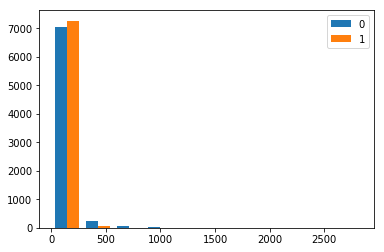

In [34]:
plt.hist([length_text0,length_text1],label=[0,1])
plt.legend()
plt.show()

In [35]:
# capital letters
reviews['cap1'] = reviews['PRODUCT_TITLE'].str.count(r'[A-Z]')/reviews['PRODUCT_TITLE'].str.len()
reviews['cap2'] = reviews['REVIEW_TITLE'].str.count(r'[A-Z]')/reviews['REVIEW_TITLE'].str.len()
reviews['cap3'] = reviews['REVIEW_TEXT'].str.count(r'[A-Z]')/reviews['REVIEW_TEXT'].str.len()
reviews.head()


,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,array_title,length_title,array_reviewtitle,length_reviewtitle,array_text,length_text,cap1,cap2,cap3
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,"[Bumkins, Nixi, Ciclo, Silicone, Teething, Nec...",10.0,"[Great, idea, for, Mom's, with, teething, babies]",7.0,"[Great, idea, for, Mom's, with, teething, babi...",21.0,0.109756,0.048780,0.046296
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,"[Toshiba, SD-V295, Tunerless, DVD, VCR, Combo,...",7.0,"[Great, purchase, for, the, price]",5.0,"[We, needed, a, new, VCR, and, found, this, on...",47.0,0.282609,0.035714,0.042857
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,"[pBone, PBONE2B, Jiggs, Mini, Plastic, Trombon...",9.0,"[the, best, trombone]",3.0,"[my, so, love, trombone, and, so, i, purchased...",53.0,0.213115,0.000000,0.000000
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...","[Toshiba, SD-V296, Tunerless, DVD, VCR, Combo,...",8.0,"[Works, well]",2.0,"[I, picked, up, one, of, these, recently,, doe...",32.0,0.229508,0.100000,0.069444
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...","[Bulova, Men's, 98B169, CAMPTON, Two-Tone, Bra...",7.0,"[Excellent, article!]",2.0,"[Very, elegant, and, sophisticated, watch,, I,...",21.0,0.274510,0.055556,0.022727


/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


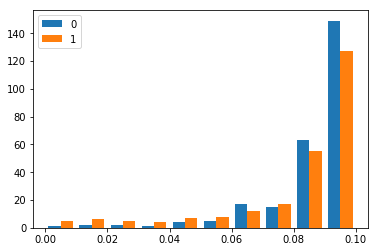

In [36]:
# product title
plt.hist([reviews[reviews['LABEL']==0]['cap1'],reviews[reviews['LABEL']==1]['cap1']],label=[0,1],range=(0,0.1))
plt.legend()
plt.show()

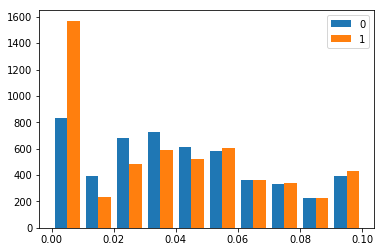

In [37]:
# review title
plt.hist([reviews[reviews['LABEL']==0]['cap2'],reviews[reviews['LABEL']==1]['cap2']],label=[0,1],range=(0,0.1))
plt.legend()
plt.show()

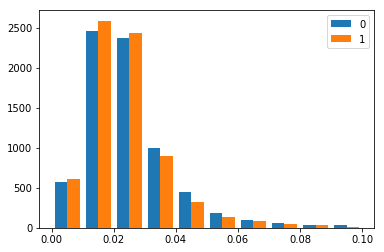

In [38]:
# review text
plt.hist([reviews[reviews['LABEL']==0]['cap3'],reviews[reviews['LABEL']==1]['cap3']],label=[0,1],range=(0,0.1))
plt.legend()
plt.show()

In [39]:
reviews.corr()

,REVIEW_ID,LABEL,RATING,length_title,length_reviewtitle,length_text,cap1,cap2,cap3
REVIEW_ID,1.000000,-0.866366,0.139722,-0.163283,0.077983,0.063937,0.041802,0.040711,0.036182
LABEL,-0.866366,1.000000,-0.006494,0.193145,-0.099133,-0.125525,-0.031239,-0.048905,-0.029093
RATING,0.139722,-0.006494,1.000000,0.059812,-0.048366,-0.005910,-0.026709,-0.003085,-0.008383
length_title,-0.163283,0.193145,0.059812,1.000000,0.049805,-0.030580,-0.041175,-0.000369,-0.000294
length_reviewtitle,0.077983,-0.099133,-0.048366,0.049805,1.000000,0.186430,0.007254,-0.190188,0.005092
length_text,0.063937,-0.125525,-0.005910,-0.030580,0.186430,1.000000,0.020468,0.029450,0.004556
cap1,0.041802,-0.031239,-0.026709,-0.041175,0.007254,0.020468,1.000000,0.028061,0.050016
cap2,0.040711,-0.048905,-0.003085,-0.000369,-0.190188,0.029450,0.028061,1.000000,0.347967
cap3,0.036182,-0.029093,-0.008383,-0.000294,0.005092,0.004556,0.050016,0.347967,1.000000


In [40]:
reviews_numerical = reviews[["RATING","VERIFIED_PURCHASE","length_title","length_reviewtitle","length_text","cap1","cap2","cap3"]]
reviews_numerical.head()

,RATING,VERIFIED_PURCHASE,length_title,length_reviewtitle,length_text,cap1,cap2,cap3
0,5.0,Y,10.0,7.0,21.0,0.109756,0.048780,0.046296
1,4.0,N,7.0,5.0,47.0,0.282609,0.035714,0.042857
2,4.0,N,9.0,3.0,53.0,0.213115,0.000000,0.000000
3,4.0,N,8.0,2.0,32.0,0.229508,0.100000,0.069444
4,5.0,Y,7.0,2.0,21.0,0.274510,0.055556,0.022727


In [41]:
#################
reviews_numerical['VERIFIED_PURCHASE']=reviews_numerical['VERIFIED_PURCHASE'].replace({"N": 0, "Y": 1})
reviews_numerical['VERIFIED_PURCHASE']=reviews_numerical['VERIFIED_PURCHASE'].fillna(0)
reviews_numerical.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RATING,VERIFIED_PURCHASE,length_title,length_reviewtitle,length_text,cap1,cap2,cap3
0,5.0,1.0,10.0,7.0,21.0,0.109756,0.048780,0.046296
1,4.0,0.0,7.0,5.0,47.0,0.282609,0.035714,0.042857
2,4.0,0.0,9.0,3.0,53.0,0.213115,0.000000,0.000000
3,4.0,0.0,8.0,2.0,32.0,0.229508,0.100000,0.069444
4,5.0,1.0,7.0,2.0,21.0,0.274510,0.055556,0.022727


In [42]:
reviews_numerical.isnull().sum()

RATING                94
VERIFIED_PURCHASE      0
length_title          99
length_reviewtitle    96
length_text           93
cap1                  99
cap2                  96
cap3                  93
dtype: int64

In [43]:
reviews_numerical['RATING'].fillna(0)
reviews_numerical.isnull().sum()

RATING                94
VERIFIED_PURCHASE      0
length_title          99
length_reviewtitle    96
length_text           93
cap1                  99
cap2                  96
cap3                  93
dtype: int64

In [44]:
#fill none
reviews_numerical['RATING']=reviews_numerical['RATING'].fillna(0)
reviews_numerical['RATING']=reviews_numerical['RATING'].fillna(0)

reviews_numerical['VERIFIED_PURCHASE']=reviews_numerical['VERIFIED_PURCHASE'].fillna(0)
reviews_numerical['VERIFIED_PURCHASE']=reviews_numerical['VERIFIED_PURCHASE'].fillna(0)

reviews_numerical['length_title']=reviews_numerical['length_title'].fillna(reviews_numerical[reviews['LABEL']==0]['length_title'].mean())
reviews_numerical['length_title']=reviews_numerical['length_title'].fillna(reviews_numerical[reviews['LABEL']==1]['length_title'].mean())

reviews_numerical['length_reviewtitle']=reviews_numerical['length_reviewtitle'].fillna(reviews_numerical[reviews['LABEL']==0]['length_reviewtitle'].mean())
reviews_numerical['length_reviewtitle']=reviews_numerical['length_reviewtitle'].fillna(reviews_numerical[reviews['LABEL']==1]['length_reviewtitle'].mean())

reviews_numerical['length_text']=reviews_numerical['length_text'].fillna(reviews_numerical[reviews['LABEL']==0]['length_text'].mean())
reviews_numerical['length_text']=reviews_numerical['length_text'].fillna(reviews_numerical[reviews['LABEL']==1]['length_text'].mean())

reviews_numerical['cap1']=reviews_numerical['cap1'].fillna(reviews_numerical[reviews['LABEL']==0]['cap1'].mean())
reviews_numerical['cap1']=reviews_numerical['cap1'].fillna(reviews_numerical[reviews['LABEL']==1]['cap1'].mean())

reviews_numerical['cap2']=reviews_numerical['cap2'].fillna(reviews_numerical[reviews['LABEL']==0]['cap2'].mean())
reviews_numerical['cap2']=reviews_numerical['cap2'].fillna(reviews_numerical[reviews['LABEL']==1]['cap2'].mean())

reviews_numerical['cap3']=reviews_numerical['cap3'].fillna(reviews_numerical[reviews['LABEL']==0]['cap3'].mean())
reviews_numerical['cap3']=reviews_numerical['cap3'].fillna(reviews_numerical[reviews['LABEL']==1]['cap3'].mean())

reviews_numerical.isnull().sum()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

RATING                0
VERIFIED_PURCHASE     0
length_title          0
length_reviewtitle    0
length_text           0
cap1                  0
cap2                  0
cap3                  0
dtype: int64

In [45]:
# text features to get tfidf
reviews_text = reviews.drop(columns=['REVIEW_ID', 'PRODUCT_ID','PRODUCT_CATEGORY','VERIFIED_PURCHASE','RATING','LABEL'])

In [46]:
# transform to string to get tfidf
reviews_text = reviews_text.applymap(str)


In [47]:
# calculate tfidf values frequency
TfidfV = TfidfVectorizer(stop_words = 'english',max_features=2000,min_df=2,max_df=0.97)
TfidfV.fit(reviews_text['REVIEW_TITLE'])
TfidfV.fit(reviews_text['REVIEW_TEXT'])
TfidfV.fit(reviews_text['PRODUCT_TITLE'])



TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.97, max_features=2000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [48]:
# values after fitting
X_train_tfidf_TITLE = TfidfV.transform(reviews_text['REVIEW_TITLE'])
X_train_tfidf_TEXT = TfidfV.transform(reviews_text['REVIEW_TEXT'])
X_train_tfidf_PROTITLE = TfidfV.transform(reviews_text['PRODUCT_TITLE'])


In [49]:
bench_data = hstack((X_train_tfidf_TITLE,X_train_tfidf_TEXT,X_train_tfidf_PROTITLE))

X_train, X_test, y_train, y_test = train_test_split(bench_data,reviews['LABEL'],test_size=0.2,random_state=0)


X_train_array_new = X_train.toarray()


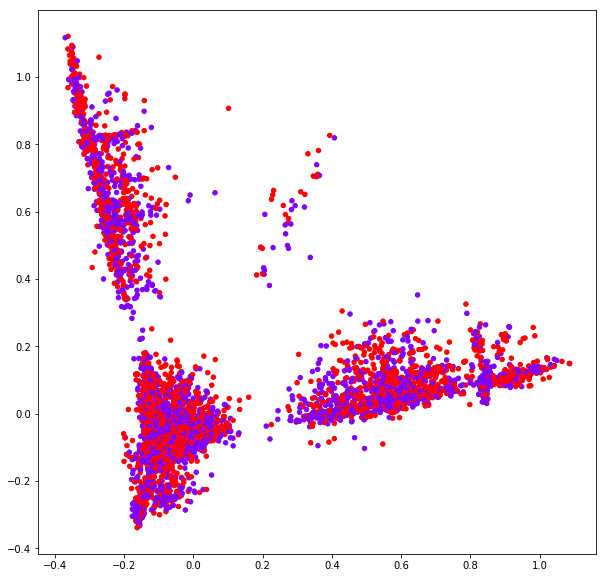

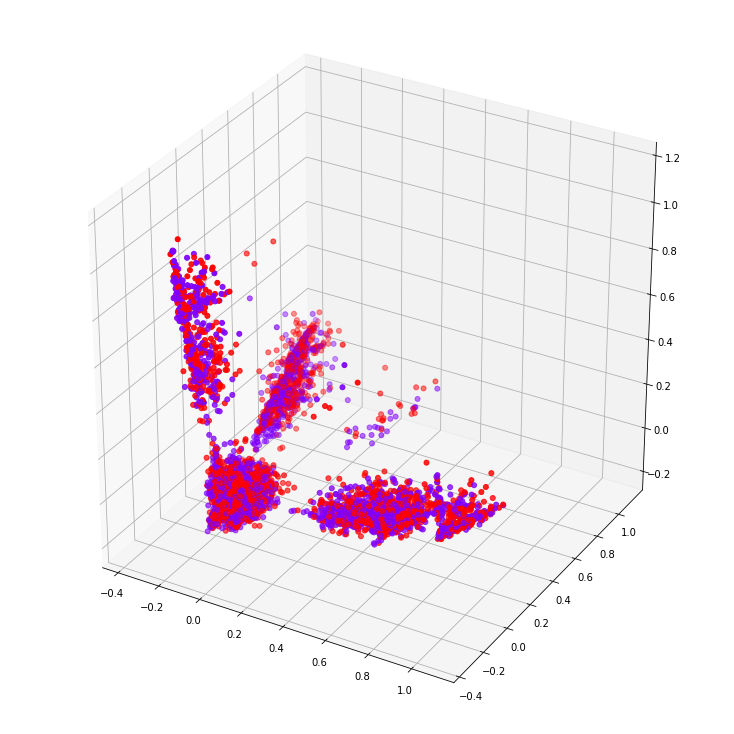

In [50]:
#PCA 

pca = PCA(n_components=3)

after_pca = pca.fit_transform(X_train_array_new)
after_pca


#2D plot
plt.figure(figsize=(10,10))
plt.scatter(after_pca[:, 0], after_pca[:, 1], s=20, c=y_train,cmap='rainbow')
plt.show()


#3D plot
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(after_pca[:, 0], after_pca[:, 1],after_pca[:, 2],s=25, c=y_train,cmap='rainbow')

In [51]:
# test the benchmark model under logistic regression


logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       370
           1       0.65      0.64      0.64       365

   micro avg       0.65      0.65      0.65       735
   macro avg       0.65      0.65      0.65       735
weighted avg       0.65      0.65      0.65       735



/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
##improvement figure out if the category is effective

category = reviews[["PRODUCT_CATEGORY"]]
category = pd.get_dummies(category,drop_first=True)
category_matrix = category.as_matrix()

improve_one = hstack((bench_data,category_matrix))
X_train, X_test, y_train, y_test = train_test_split(improve_one,reviews['LABEL'],test_size=0.05,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))




/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


              precision    recall  f1-score   support

           0       0.65      0.67      0.66       370
           1       0.65      0.62      0.64       365

   micro avg       0.65      0.65      0.65       735
   macro avg       0.65      0.65      0.65       735
weighted avg       0.65      0.65      0.65       735



In [53]:
pro_title = reviews_numerical[['length_title']]
pro_matrix = pro_title.as_matrix()

improve_pro = hstack((bench_data,pro_matrix))
X_train, X_test, y_train, y_test = train_test_split(improve_pro,reviews['LABEL'],test_size=0.05,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       370
           1       0.67      0.65      0.66       365

   micro avg       0.67      0.67      0.67       735
   macro avg       0.67      0.67      0.67       735
weighted avg       0.67      0.67      0.67       735



In [54]:
##improvement to figure out if the length of the review title and review text useful

length_factor=reviews_numerical[['length_reviewtitle','length_text']]
capital_factor=reviews_numerical[['cap2','cap3']]

length_matrix = length_factor.as_matrix()
capital_matrix = capital_factor.as_matrix()

improve_two = hstack((bench_data,length_matrix,capital_matrix))
X_train, X_test, y_train, y_test = train_test_split(improve_two,reviews['LABEL'],test_size=0.05,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))



/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       370
           1       0.66      0.64      0.65       365

   micro avg       0.66      0.66      0.66       735
   macro avg       0.66      0.66      0.66       735
weighted avg       0.66      0.66      0.66       735



In [55]:

## improvement figure out if the rating useful

rating_factor = reviews_numerical[['RATING']]
rating_matrix = rating_factor.as_matrix()

improve_three = hstack((bench_data,rating_matrix))
X_train, X_test, y_train, y_test = train_test_split(improve_three,reviews['LABEL'],test_size=0.05,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       370
           1       0.66      0.64      0.65       365

   micro avg       0.66      0.66      0.66       735
   macro avg       0.66      0.66      0.66       735
weighted avg       0.66      0.66      0.66       735



/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [56]:
vpur_factor = reviews_numerical[['VERIFIED_PURCHASE']]
vpur_matrix = vpur_factor.as_matrix()

improve_four = hstack((bench_data,vpur_matrix))
X_train, X_test, y_train, y_test = train_test_split(improve_four,reviews['LABEL'],test_size=0.2,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1459
           1       0.83      0.81      0.82      1481

   micro avg       0.82      0.82      0.82      2940
   macro avg       0.82      0.82      0.82      2940
weighted avg       0.82      0.82      0.82      2940



In [57]:
# final model 

improve_final = hstack((bench_data,vpur_matrix,rating_matrix,length_matrix,capital_matrix))


X_train, X_test, y_train, y_test = train_test_split(improve_final,reviews['LABEL'],test_size=0.05,random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       370
           1       0.86      0.84      0.85       365

   micro avg       0.85      0.85      0.85       735
   macro avg       0.85      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



In [58]:
improve_final.shape


(14700, 6006)

In [59]:
#test
dataset_test = pd.read_csv("review_test.csv")

#calculate the length and capital letter ratio
dataset_test['length_title']=dataset_test['REVIEW_TITLE'].str.split(" ").str.len()
dataset_test['length_text']=dataset_test['REVIEW_TEXT'].str.split(" ").str.len()
dataset_test['Cap_title'] = dataset_test['REVIEW_TITLE'].str.count(r'[A-Z]')/dataset_test['REVIEW_TITLE'].str.len()
dataset_test['Cap_text'] = dataset_test['REVIEW_TEXT'].str.count(r'[A-Z]')/dataset_test['REVIEW_TEXT'].str.len()

# transfer verified purchase to 0,1
dataset_test_number = dataset_test[["RATING","VERIFIED_PURCHASE"]]
dataset_test_number= dataset_test_number.replace({"N": 0, "Y": 1})
dataset_test_number = dataset_test_number.fillna(0)
test_number_matrix=dataset_test_number.as_matrix()

#fill the missing length and raito to mean
dataset_test['Cap_title']=dataset_test['Cap_title'].fillna(dataset_test['Cap_title'].mean())
dataset_test['Cap_text']=dataset_test['Cap_text'].fillna(dataset_test['Cap_text'].mean())
dataset_test['length_title']=dataset_test['length_title'].fillna(dataset_test['length_title'].mean())
dataset_test['length_text']=dataset_test['length_text'].fillna(dataset_test['length_text'].mean())


#deal with the text data
test_text_data = dataset_test.drop(columns=['REVIEW_ID', 'PRODUCT_ID','PRODUCT_CATEGORY','VERIFIED_PURCHASE','RATING'])
test_text_data = test_text_data.applymap(str)
TfidfV = TfidfVectorizer(stop_words = 'english',max_features=2000,min_df=2,max_df=0.97)
TfidfV.fit(test_text_data['REVIEW_TITLE'])
TfidfV.fit(test_text_data['REVIEW_TEXT'])
TfidfV.fit(test_text_data['PRODUCT_TITLE'])

X_test_tfidf_TITLE = TfidfV.transform(test_text_data['REVIEW_TITLE'])
X_test_tfidf_TEXT = TfidfV.transform(test_text_data['REVIEW_TEXT'])
X_test_tfidf_PROTITLE = TfidfV.transform(test_text_data['PRODUCT_TITLE'])


test_numerical=dataset_test[["length_title","length_text","Cap_title","Cap_text"]]
test_numerical_matrix=test_numerical.as_matrix()

data_input=hstack((X_test_tfidf_TITLE,X_test_tfidf_TEXT,X_test_tfidf_PROTITLE,test_number_matrix,test_numerical_matrix))

review_id = dataset_test[['REVIEW_ID']]
pre_label = logreg.predict(data_input)
review_id["pred_label"] = pre_label

review_id.to_csv('Group39_BUSS6002_Assignment2_Test_Results.csv',index=False)


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
